In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable


### calling in 10k SHMFs

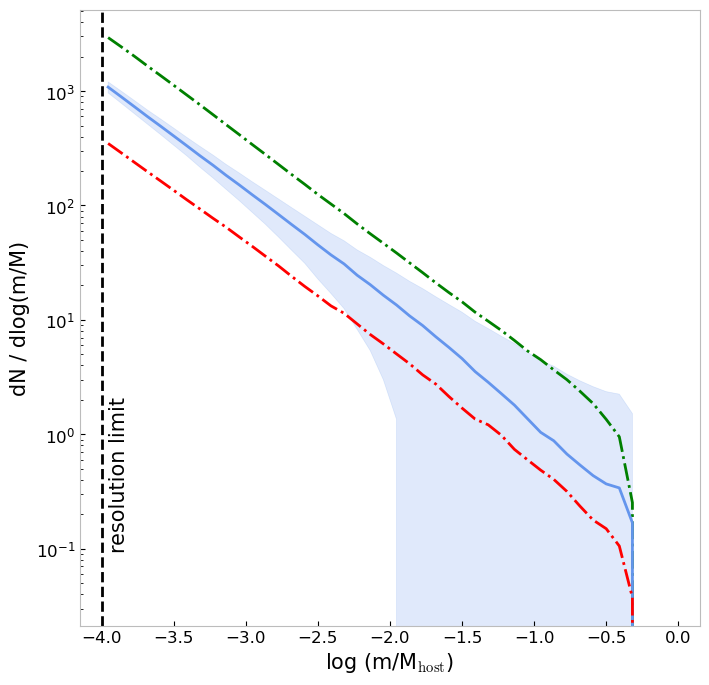

In [2]:
massmat = jsm_halopull.MassMat("../../../data/MW-analog/meta_data_psi4/", Nsamp=100, ratmin=-4, plot=True)

In [3]:
SAGA_surv = massmat.lgMh_acc_surv[0:100]

perfect = np.tile(massmat.lgMh_acc_surv[0], (100, 1))

#### defining the forward model

In [4]:
def push(lgMh, theta, min_mass):
    lgMs = jsm_SHMR.general(theta, lgMh, 0, 1)
    stat = jsm_stats.SatStats_D(lgMs, min_mass)
    return stat.Nsat_perhost, stat.PNsat, stat.PNsat_range

In [5]:
sigma_mstar = np.linspace(0, 1, 100)
norm = Normalize(vmin=sigma_mstar.min(), vmax=sigma_mstar.max())
cmap = plt.get_cmap('RdBu_r')

### lets start with the fiducial minimum of 6.5

In [6]:
fid_theta = [10.5, 1.5, 0.0, 0, 0, 0]

min_mass = 6.5
Nsat, Npdf, Nrange = push(SAGA_surv, fid_theta, min_mass)
Nsat_up, Npdf_up, _ = push(SAGA_surv,  [10.5, 1.5, 1., 0, 0, 0], min_mass)

In [7]:
Nsat_mat = np.zeros(shape=(sigma_mstar.shape[0], 100))
Npdf_mat = np.zeros(shape=(sigma_mstar.shape[0], 700))

for i, sigma in enumerate(sigma_mstar):
    Nsat_i, Npdf_i, _ = push(perfect, [10.5, 1.5, sigma, 0, 0, 0], min_mass)
    Nsat_mat[i] = Nsat_i
    Npdf_mat[i] = Npdf_i

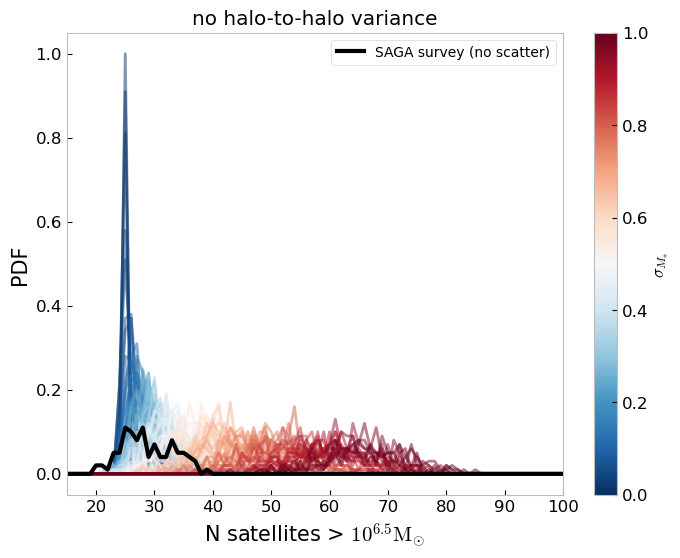

In [8]:
plt.figure(figsize=(8,6))
plt.title("no halo-to-halo variance")
for i,Npdf_i in enumerate(Npdf_mat):
    plt.plot(Nrange, Npdf_i, color=cmap(norm(sigma_mstar[i])), alpha=0.5)

plt.plot(Nrange, Npdf, color="black", lw=3, label="SAGA survey (no scatter)")
# plt.plot(Nrange, Npdf_up, color="firebrick", lw=3, label="SAGA survey (1 dex)")
plt.legend()
    
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, label='$\\sigma_{M_{*}}$')

plt.xlim(15,100)
plt.xlabel("N satellites > $10^{"+str(min_mass)+"} \mathrm{M_{\odot}}$", fontsize=15)
plt.ylabel("PDF", fontsize=15)
plt.show()

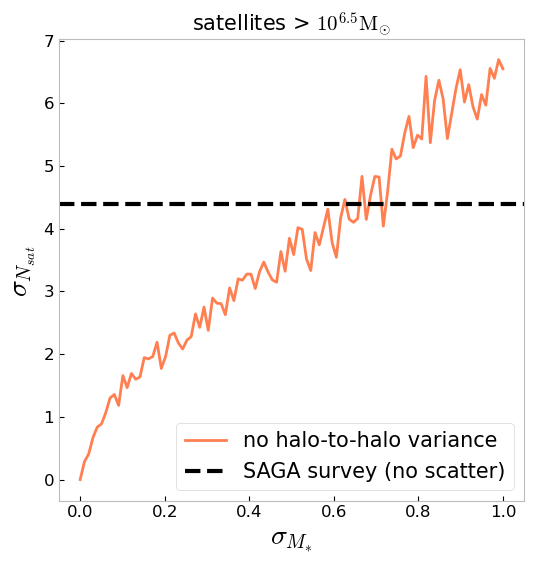

In [9]:
plt.figure(figsize=(6,6))
plt.title("satellites > $10^{"+str(min_mass)+"} \mathrm{M_{\odot}}$", fontsize=15)
plt.plot(sigma_mstar, np.std(Nsat_mat, axis=1), color="coral", label="no halo-to-halo variance")
plt.axhline(np.std(Nsat), color="black", ls="--", lw=3, label="SAGA survey (no scatter)")
plt.xlabel('$\\sigma_{M_{*}}$', fontsize=20)
plt.ylabel("$\\sigma_{N_{sat}}$ ", fontsize=20)
plt.legend(loc = "lower right", fontsize=15)
plt.show()

### same as before but now down to 5.5

In [10]:
fid_theta = [10.5, 1.5, 0.0, 0, 0, 0]

min_mass = 5.5
Nsat, Npdf, Nrange = push(SAGA_surv, fid_theta, min_mass)

In [11]:
Nsat_mat = np.zeros(shape=(sigma_mstar.shape[0], 100))
Npdf_mat = np.zeros(shape=(sigma_mstar.shape[0], 700))

for i, sigma in enumerate(sigma_mstar):
    Nsat_i, Npdf_i, _ = push(perfect, [10.5, 1.5, sigma, 0, 0, 0], min_mass)
    Nsat_mat[i] = Nsat_i
    Npdf_mat[i] = Npdf_i

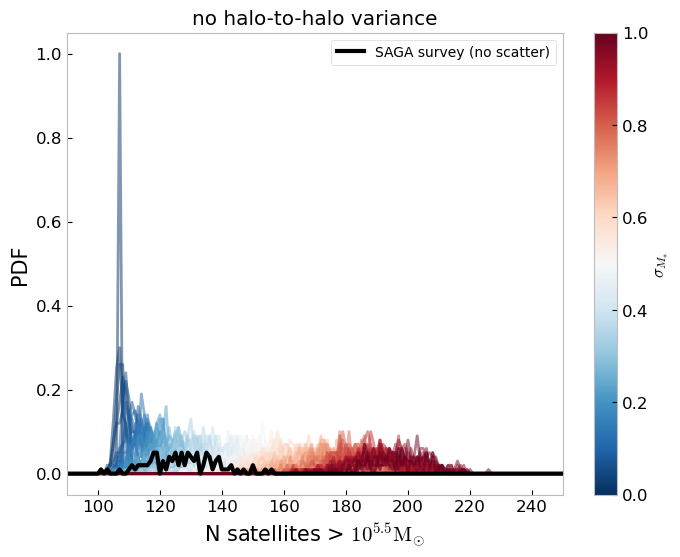

In [12]:
plt.figure(figsize=(8,6))
plt.title("no halo-to-halo variance")
for i,Npdf_i in enumerate(Npdf_mat):
    plt.plot(Nrange, Npdf_i, color=cmap(norm(sigma_mstar[i])), alpha=0.5)

plt.plot(Nrange, Npdf, color="black", lw=3, label="SAGA survey (no scatter)")
# plt.plot(Nrange, Npdf_up, color="firebrick", lw=3, label="SAGA survey (1 dex)")
plt.legend()
    
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, label='$\\sigma_{M_{*}}$')

plt.xlim(90,250)
plt.xlabel("N satellites > $10^{"+str(min_mass)+"} \mathrm{M_{\odot}}$", fontsize=15)
plt.ylabel("PDF", fontsize=15)
plt.show()

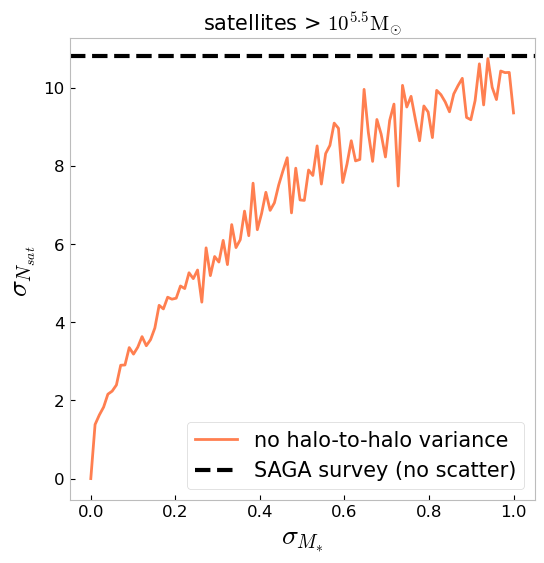

In [13]:
plt.figure(figsize=(6,6))
plt.title("satellites > $10^{"+str(min_mass)+"} \mathrm{M_{\odot}}$", fontsize=15)
plt.plot(sigma_mstar, np.std(Nsat_mat, axis=1), color="coral", label="no halo-to-halo variance")
plt.axhline(np.std(Nsat), color="black", ls="--", lw=3, label="SAGA survey (no scatter)")
plt.xlabel('$\\sigma_{M_{*}}$', fontsize=20)
plt.ylabel("$\\sigma_{N_{sat}}$ ", fontsize=20)
plt.legend(loc = "lower right", fontsize=15)
plt.show()

### same as before but now down to 4.5

In [14]:
fid_theta = [10.5, 1.5, 0.0, 0, 0, 0]

min_mass = 4.5
Nsat, Npdf, Nrange = push(SAGA_surv, fid_theta, min_mass)

In [15]:
Nsat_mat = np.zeros(shape=(sigma_mstar.shape[0], 100))
Npdf_mat = np.zeros(shape=(sigma_mstar.shape[0], 700))

for i, sigma in enumerate(sigma_mstar):
    Nsat_i, Npdf_i, _ = push(perfect, [10.5, 1.5, sigma, 0, 0, 0], min_mass)
    Nsat_mat[i] = Nsat_i
    Npdf_mat[i] = Npdf_i

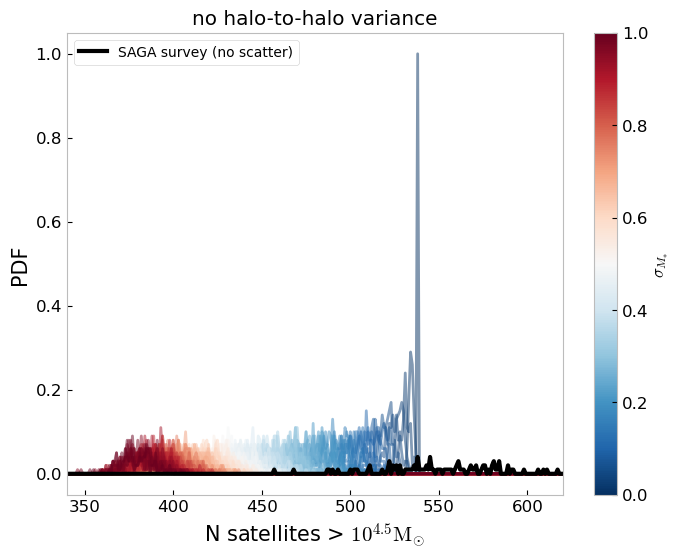

In [16]:
plt.figure(figsize=(8,6))
plt.title("no halo-to-halo variance")
for i,Npdf_i in enumerate(Npdf_mat):
    plt.plot(Nrange, Npdf_i, color=cmap(norm(sigma_mstar[i])), alpha=0.5)

plt.plot(Nrange, Npdf, color="black", lw=3, label="SAGA survey (no scatter)")
# plt.plot(Nrange, Npdf_up, color="firebrick", lw=3, label="SAGA survey (1 dex)")
plt.legend()
    
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, label='$\\sigma_{M_{*}}$')

plt.xlim(340,620)
plt.xlabel("N satellites > $10^{"+str(min_mass)+"} \mathrm{M_{\odot}}$", fontsize=15)
plt.ylabel("PDF", fontsize=15)
plt.show()

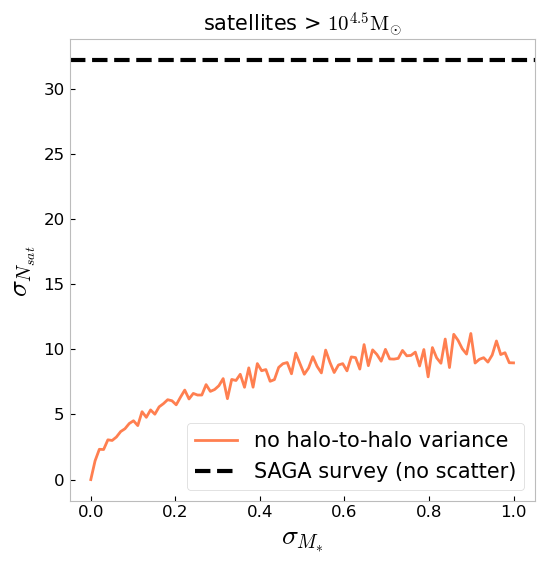

In [17]:
plt.figure(figsize=(6,6))
plt.title("satellites > $10^{"+str(min_mass)+"} \mathrm{M_{\odot}}$", fontsize=15)
plt.plot(sigma_mstar, np.std(Nsat_mat, axis=1), color="coral", label="no halo-to-halo variance")
plt.axhline(np.std(Nsat), color="black", ls="--", lw=3, label="SAGA survey (no scatter)")
plt.xlabel('$\\sigma_{M_{*}}$', fontsize=20)
plt.ylabel("$\\sigma_{N_{sat}}$ ", fontsize=20)
plt.legend(loc = "lower right", fontsize=15)
plt.show()